In [3]:
# !pip install mglearn

In [1]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn # 분류 관련된 샘플 데이터셋이 있음.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
# 분류(딥러닝이 대세), 예측, 추정
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')


In [4]:
x_data, y_data = mglearn.datasets.make_forge()

In [5]:
x_data #임의의 특성 데이터

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [6]:
y_data

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size=0.2,
                                                   stratify=y_data)

In [8]:
# 알고리즘을 시각화해서 보여줌. 지난주까진 경사하강법을 이용한 것이었음.
# Linear, LGDR, 릿지, 라쏘, 엘라스틱넷, 로지스틱
# 이건 가감하강법?

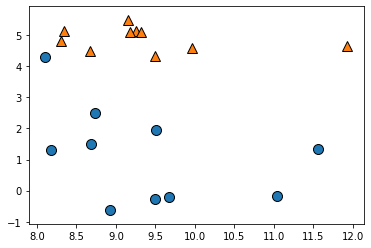

In [38]:
# 특성데이터 0 또는 1
# 0인거는 동그라미, 1인것은 세모로

mglearn.discrete_scatter(x_train[:,0],x_train[:,1], y_train)
# plt.legend()
plt.show()


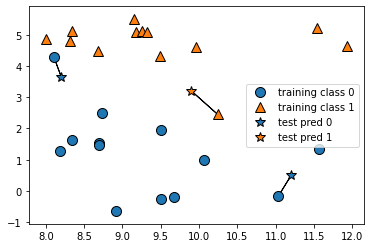

In [39]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
# 1분류는 거리가 가장 가까운 데이터를 봄

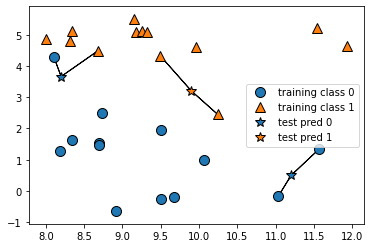

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=2)
# 2분류는 가장 인접한 2개를 봄. 

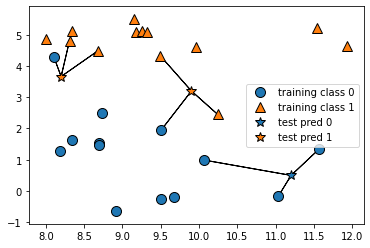

In [41]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 각각 다수결로 가장 많은 것. 똑같으면 가까운 것.
# 가장 가까운 것 3개를 봐서 삼각형이 많은지, 동그라미가 많은지 보고
# 많은 걸로 분류해줌.

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=3)
# 이웃을 세개 두고 가장 높은 쪽으로 분류를 둡니당.
# 시그모이드 함수로 확률로 경사하강법, 미분을 이용해서 했었음
# 이전에는 weight bias가 x_train을 바꿨지만
# 이건 다수결로 의해서 분류한다고 이해하면 됨.
# 좌표계산으로 x_train값이 바뀐다고 생각하면 될듯.
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
model_knn.predict([[9,5.1]])

array([1])

In [44]:
model_knn.predict(x_test)

array([1, 0, 0, 0, 0, 1])

In [45]:
y_test

array([1, 0, 1, 0, 0, 1])

In [46]:
model_knn.score(x_test, y_test)

0.8333333333333334

In [47]:
param_value = {'n_neighbors':[1,2,3,4,5]}
gridSearch = GridSearchCV(KNeighborsClassifier(),
                         param_grid=param_value)
gridSearch.fit(x_train, y_train)
# 교차검증까지 함.

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [48]:
gridSearch.best_params_

{'n_neighbors': 1}

In [49]:
gridSearch.best_score_ # 교차검증한 값

0.95

In [50]:
gridSearch.best_estimator_.predict(x_test)

array([1, 0, 0, 0, 0, 1])

---
예제

In [52]:
from sklearn.datasets import load_iris

In [54]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [64]:
iris_df = pd.DataFrame([iris])
iris_df

,data,target,frame,target_names,DESCR,feature_names,filename
0,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,"[setosa, versicolor, virginica]",.. _iris_dataset:\n\nIris plants dataset\n----...,"[sepal length (cm), sepal width (cm), petal le...",C:\Users\medici\anaconda3\lib\site-packages\sk...


In [79]:
x_data = iris['data']
x_data

NameError: name 'ndarray' is not defined

In [73]:
y_data = iris['target']
y_data

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: target, dtype: object

---